In [89]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import regex

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
### Read in variables from Data_Collection
%store -r folk_artists
%store -r pop_artists
%store -r dance_artists

In [90]:
lyrics = pd.read_csv('./all_lyrics.csv')
lyrics.head()

,artist_name,lyrics
0,John Mayer,"Ah, ah, ah\nAh...\n\nI'm the boy in your other..."
1,Jack Johnson,Can't you see that it's just raining?\nThere a...


###  Create Artist sub-groups Dataframes

In [1]:
def new_artist_df(df, artist_list): #takes the dataframe and a list of artist_name strings
    
    #create a new dataframe with only the selected artist(s) 
    artists = '|'.join(artist_list)
    artists_df = df[df['artist_name'].str.contains(artists, regex=True)]
    
    return artists_df

In [92]:
#only get John Mayer
john_mayer = new_artist_df(lyrics, ['John Mayer'])
john_mayer.head()

,artist_name,lyrics
0,John Mayer,"Ah, ah, ah\nAh...\n\nI'm the boy in your other..."


In [93]:
#Jack Johnson
jack_johnson = new_artist_df(lyrics, ['Jack Johnson'])
jack_johnson.head()

,artist_name,lyrics
1,Jack Johnson,Can't you see that it's just raining?\nThere a...


In [94]:
#get both John Mayer and Jack Johnson
jack_john = new_artist_df(lyrics, ['John Mayer','Jack Johnson'])
jack_john.head()

,artist_name,lyrics
0,John Mayer,"Ah, ah, ah\nAh...\n\nI'm the boy in your other..."
1,Jack Johnson,Can't you see that it's just raining?\nThere a...


### Find Most Frequent Words

In [95]:
#orders the occurrence of each word based on selected artist lyrics
def most_freq(df):
    
    #instantiate CountVectorizer
    cvec_df = CountVectorizer(stop_words='english')
    
    #select lyrics and fit
    X_series = df['lyrics']
    X_series =  cvec_df.fit_transform(X_series)
    
    #convert to a dataframe
    X_df = pd.DataFrame(X_series.toarray(),
    columns=cvec_df.get_feature_names())
    
    # create empty dictionary
    top_words = {}

    # loop through columns
    for i in X_df.columns:
        # save sum of each column in dictionary
        top_words[i] =  X_df[i].sum()

    # top_words to dataframe sorted by highest occurance
    most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))
    
    return most_freq

In [96]:
#get most frequent words for John Mayer
john_mayer_most_freq = most_freq(john_mayer)
john_mayer_most_freq.head()

,0,1
0,love,310
1,just,235
2,oh,211
3,don,207
4,like,205


In [97]:
#get the most frequent lyrics for John Mayer and Jack Johnson
jack_john_most_freq = most_freq(jack_john)
jack_john_most_freq.head()

,0,1
0,just,544
1,don,469
2,love,431
3,know,383
4,got,358


### Plot most frequent words

In [98]:
def plot_most_freq(df, num_words, artist_string):
    
    plt.figure(figsize=(20,8))
    plt.bar(df[0][:num_words], df[1][:num_words])
    plt.title(f'Most Frequent Words in {artist_string} Songs',fontsize=18);

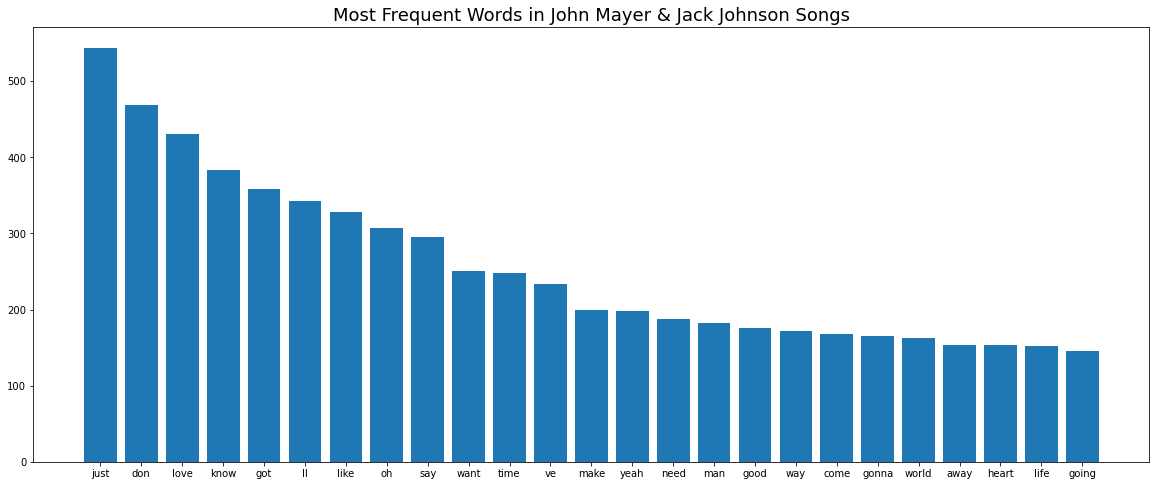

In [99]:
#plot both Jack Johnson and John Mayer
plot_most_freq(jack_john_most_freq, 25, 'John Mayer & Jack Johnson')

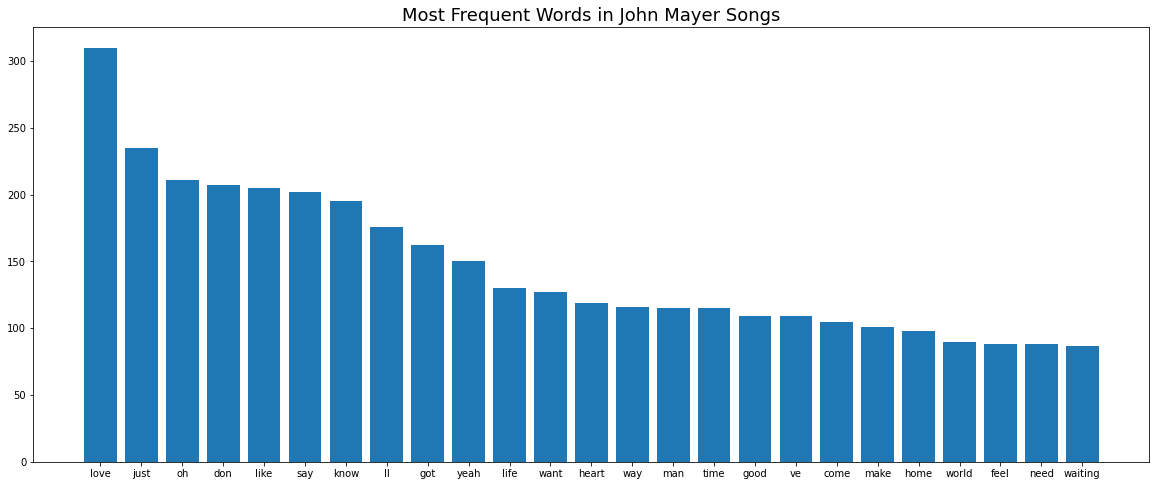

In [100]:
#Plot John Mayer
plot_most_freq(john_mayer_most_freq, 25, 'John Mayer')

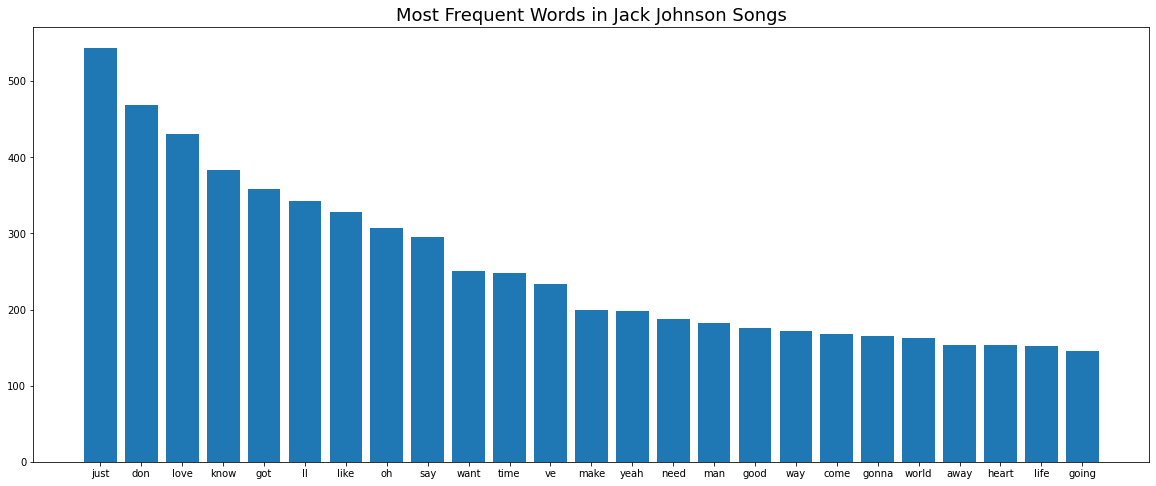

In [101]:
#Plot Jack Johnson
plot_most_freq(jack_john_most_freq, 25, 'Jack Johnson')

## Save as Text File

In [102]:
john_mayer['lyrics'].to_csv('john_mayer.txt', header=False, index=False, sep='\t', mode='a')
